In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pandas as pd
from scipy import stats

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)


from matplotlib.markers import TICKDOWN

In [2]:
def file_import(file_path, sheet_names):
    file_name = pd.read_excel(file_path, sheet_name = sheet_names)
    return file_name

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def pearsonr_1D(x, y):
    if (x.size != y.size):
        return None
    
    xm = x - np.mean(x)
    ym = y - np.mean(y)
    upper = np.sum(xm * ym)
    lower = np.sqrt(np.sum(np.power(xm, 2)) * np.sum(np.power(ym, 2)))
    
    if (lower == 0):
        return None
    
    rho = upper / lower
    return rho

In [3]:
# Import Data
p16_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\220701_irrad_p16.xlsx", ["Prediction"])
p16_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\220701_irrad_p16.xlsx", ["Target"])

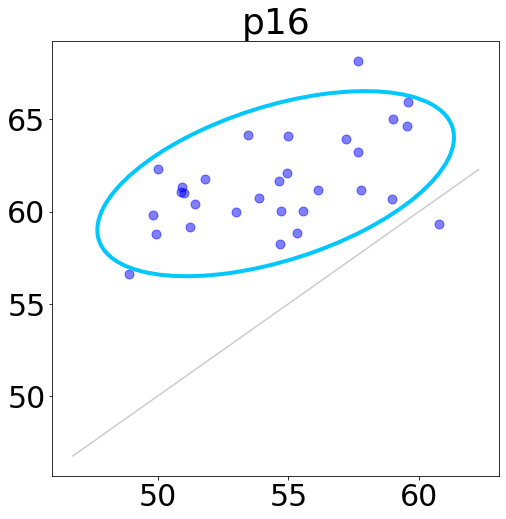

In [4]:
fig, axs = plt.subplots(figsize = [8,8])

# Plot Scatter Plots
plt.scatter(p16_target["Target"].Mean, p16_pred["Prediction"].Mean, c = "blue", alpha = 0.5, label = "Control", s=80)

# Plot Circles
confidence_ellipse (p16_target["Target"].Mean, p16_pred["Prediction"].Mean, ax = axs, n_std = 2.0, edgecolor = "#00c8ff", linewidth=4)

# Plot Titles
plt.title ("p16")
# plt.xlabel ("Target Intensity", fontsize = 'small')
# plt.ylabel ("Prediction Intensity", fontsize = 'small')
# plt.legend()

# Plot f(x) = x
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot (x, x, c = 'black', alpha = 0.2)

# plt.legend(frameon=False, loc='upper center', ncol = 5, fontsize = 'x-small', labelspacing = 0, handlelength = 1.5, handletextpad = 0, borderpad = 0, columnspacing = 0)

# plt.plot(figsize=(300, 150), dpi=100)
# plt.savefig(fname="p16")

[Text(0.175, 0, 'IR')]

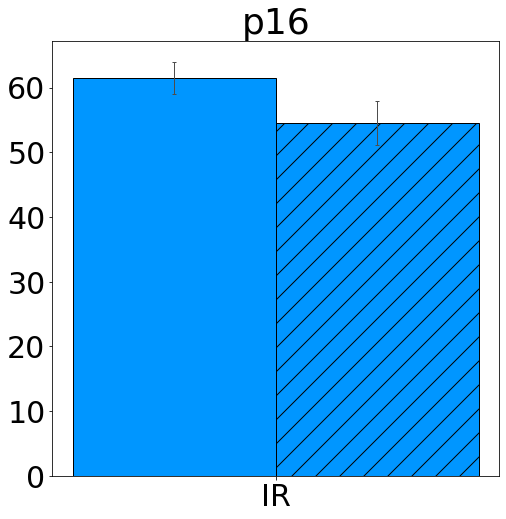

In [5]:
# Constants
indexes = np.arange(1)
bar_width = 0.35

# Create Subplot
fix, ax = plt.subplots(figsize = [8,8])

# Plot Barplot
error_config = dict(elinewidth = 1, ecolor = '0.3', capsize = 2)
ax.bar(0, p16_pred["Prediction"].Mean.mean(), bar_width, yerr = p16_pred["Prediction"].Mean.std(), error_kw = error_config, color = "#0096ff", edgecolor = "black")
ax.bar(bar_width, p16_target["Target"].Mean.mean(), bar_width, yerr = p16_target["Target"].Mean.std(), error_kw = error_config, color = "#0096ff", hatch = "/", edgecolor = "black")


# Plot Titles
ax.set_title("p16")
# ax.set_ylabel("Mean Intensity")
ax.set_xticks(indexes + bar_width / 2)
ax.set_xticklabels(["IR"])

# prediction_label = mpatches.Patch(facecolor='#0096ff', label='Prediction')
# target_label = mpatches.Patch(facecolor='#0096ff', hatch = "/", label='Target')
# plt.legend(handles=[prediction_label, target_label], frameon=False, loc='upper left', fontsize = 'xx-small', borderpad = 0)

In [6]:
stats.ttest_ind (p16_pred["Prediction"].Mean, p16_target["Target"].Mean)

Ttest_indResult(statistic=9.055789804863334, pvalue=1.072904738972371e-12)